In [544]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [545]:
#df = pd.DataFrame(df.row.str.split(' ',1).tolist(), columns = ['flips','row'])

In [546]:
raw_data = pd.read_excel("./Data_Train.xlsx")

In [547]:
bckup = pd.read_excel("./Data_Train.xlsx")

In [548]:
raw_data.shape

(10683, 11)

In [549]:
raw_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [550]:
raw_data['Date_of_Journey'] = pd.to_datetime(raw_data['Date_of_Journey'])

In [551]:
raw_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [552]:
raw_data['Route'].str.split("→",expand = True).tail(3)

,0,1,2,3,4,5
10680,BLR,DEL,None,None,None,None
10681,BLR,DEL,None,None,None,None
10682,DEL,GOI,BOM,COK,None,None


In [553]:
raw_data['Airline'].replace({'Multiple carriers Premium economy':'MCPE','Jet Airways Business':'JAB',
                            'Vistara Premium economy':'VPE'},inplace = True)

In [554]:
raw_data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [555]:
#Mapping New Delhi to Delhi
#raw_data['Destination'].replace({'New Delhi':'Delhi'}, inplace=True)

In [556]:
raw_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [557]:
raw_data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

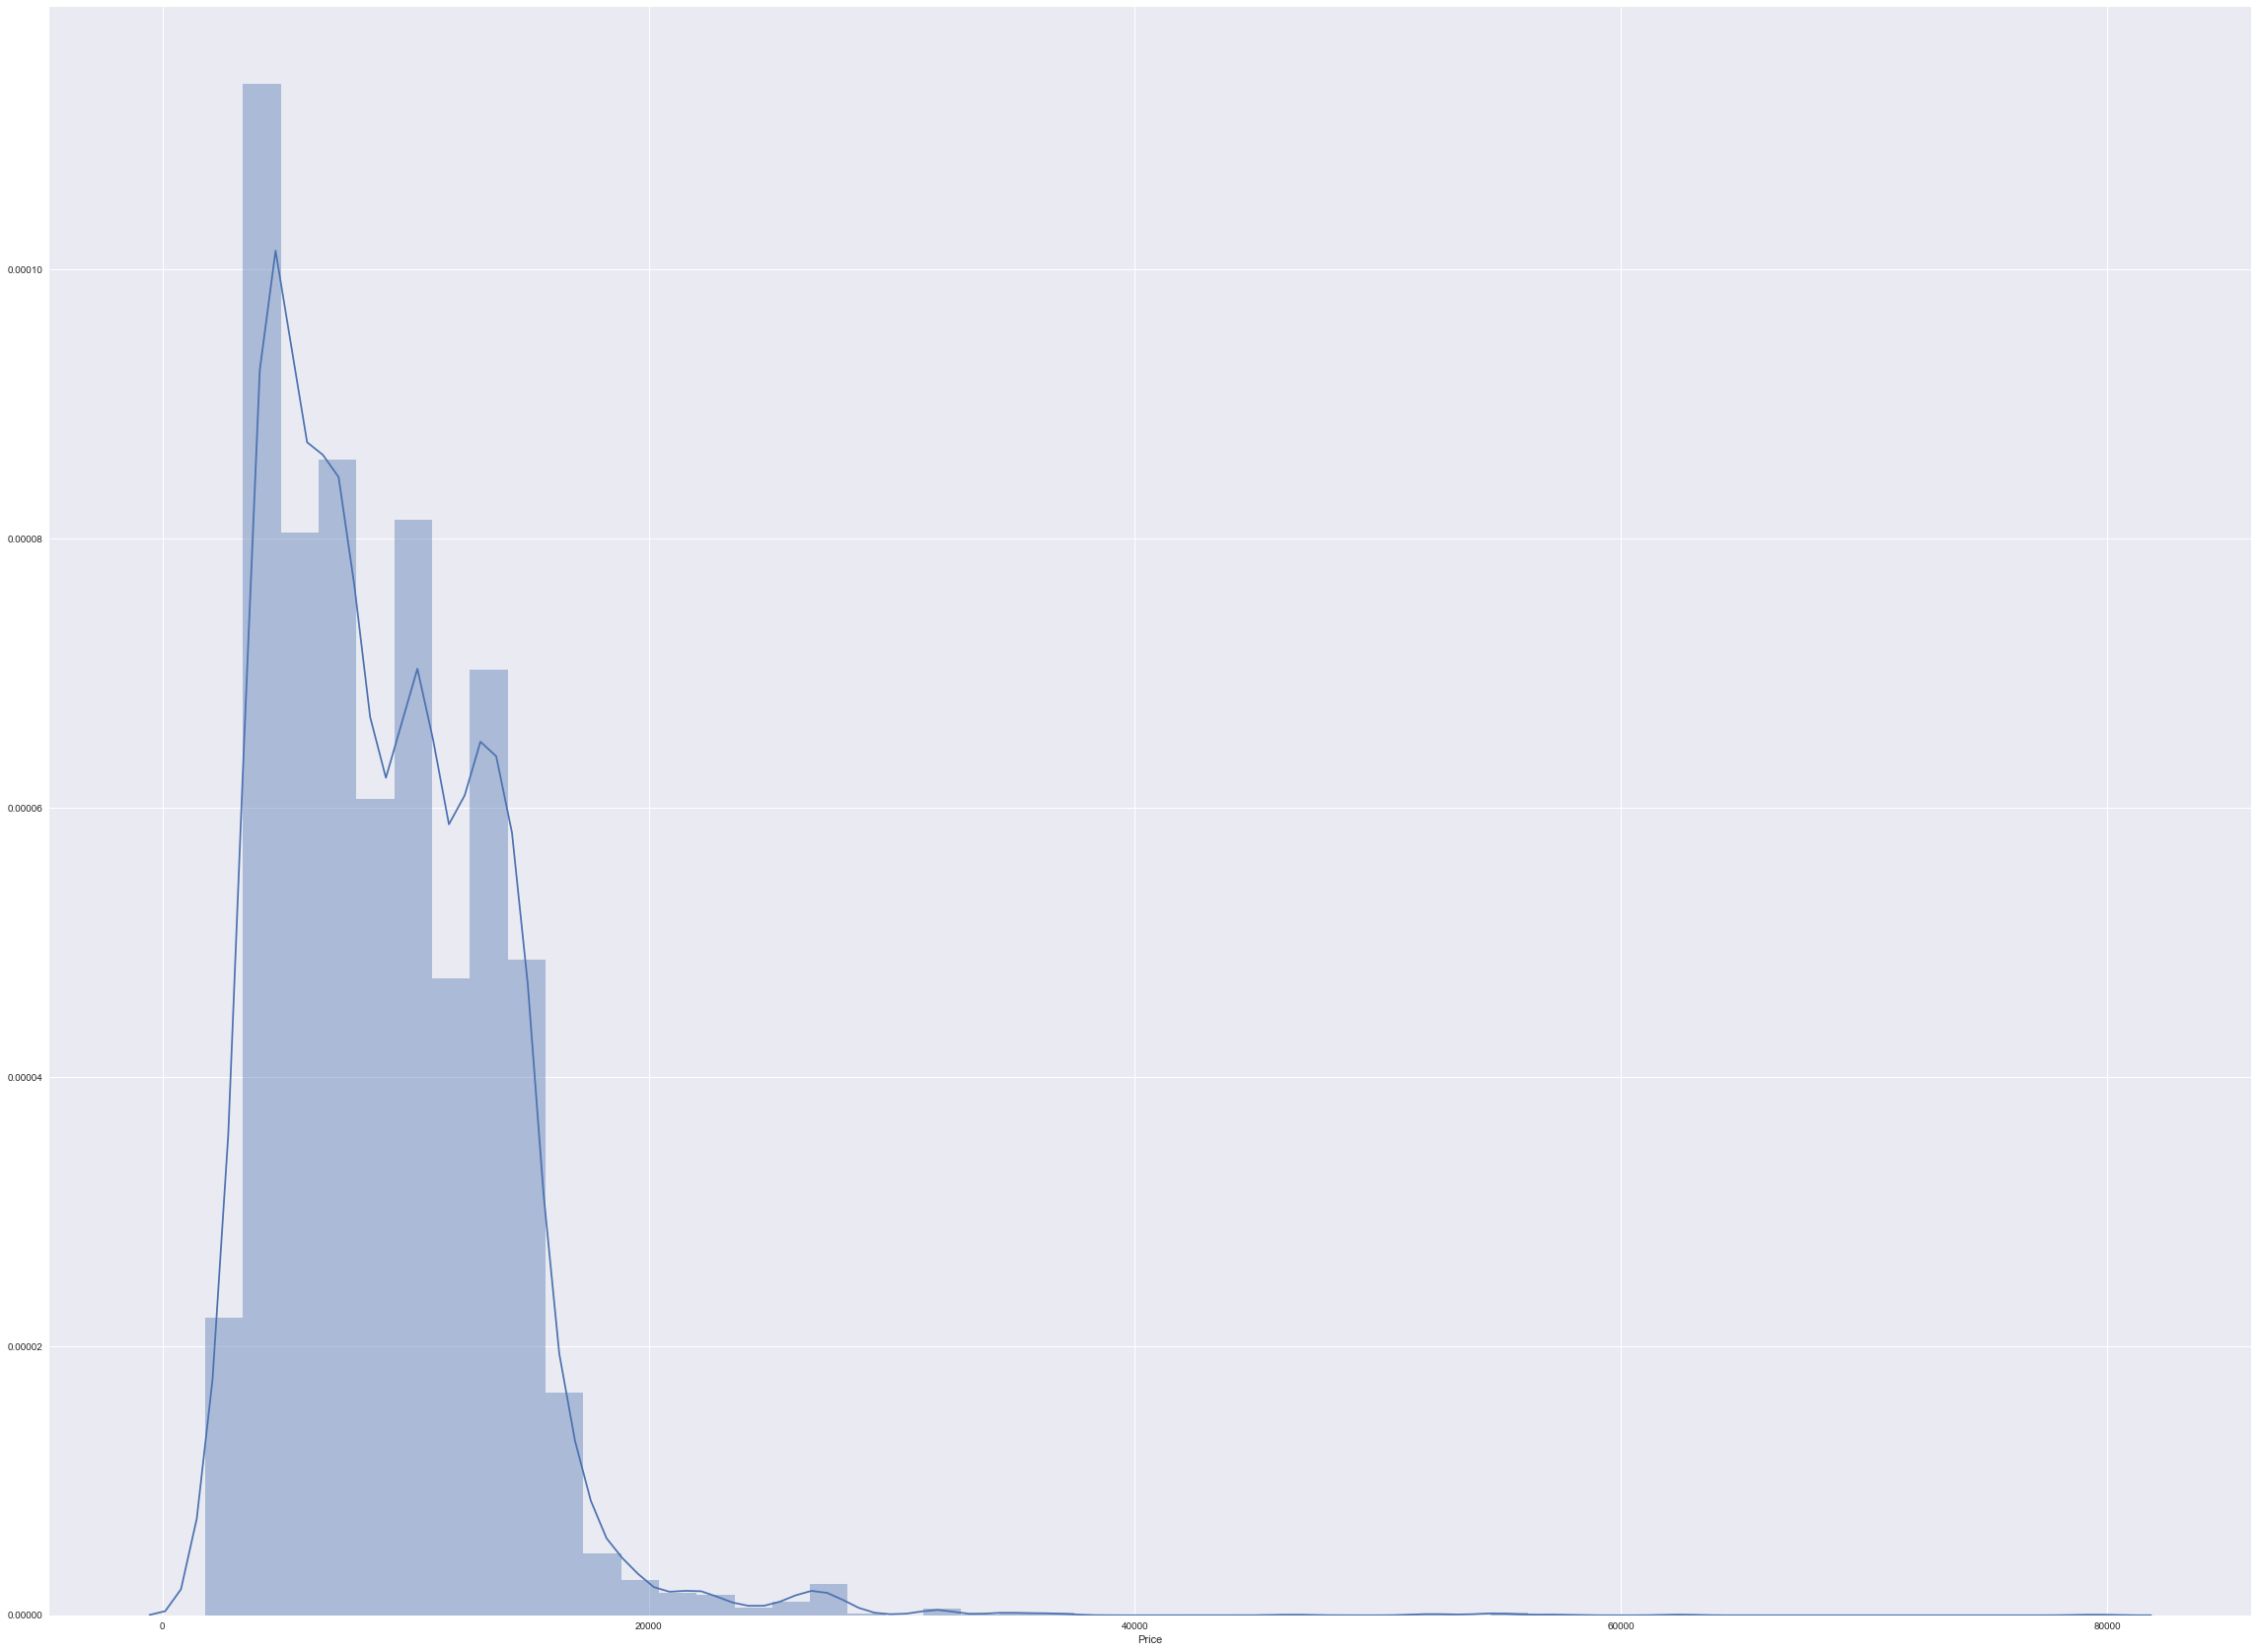

In [558]:
sns.distplot(raw_data["Price"])
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=4)   
plt.show()

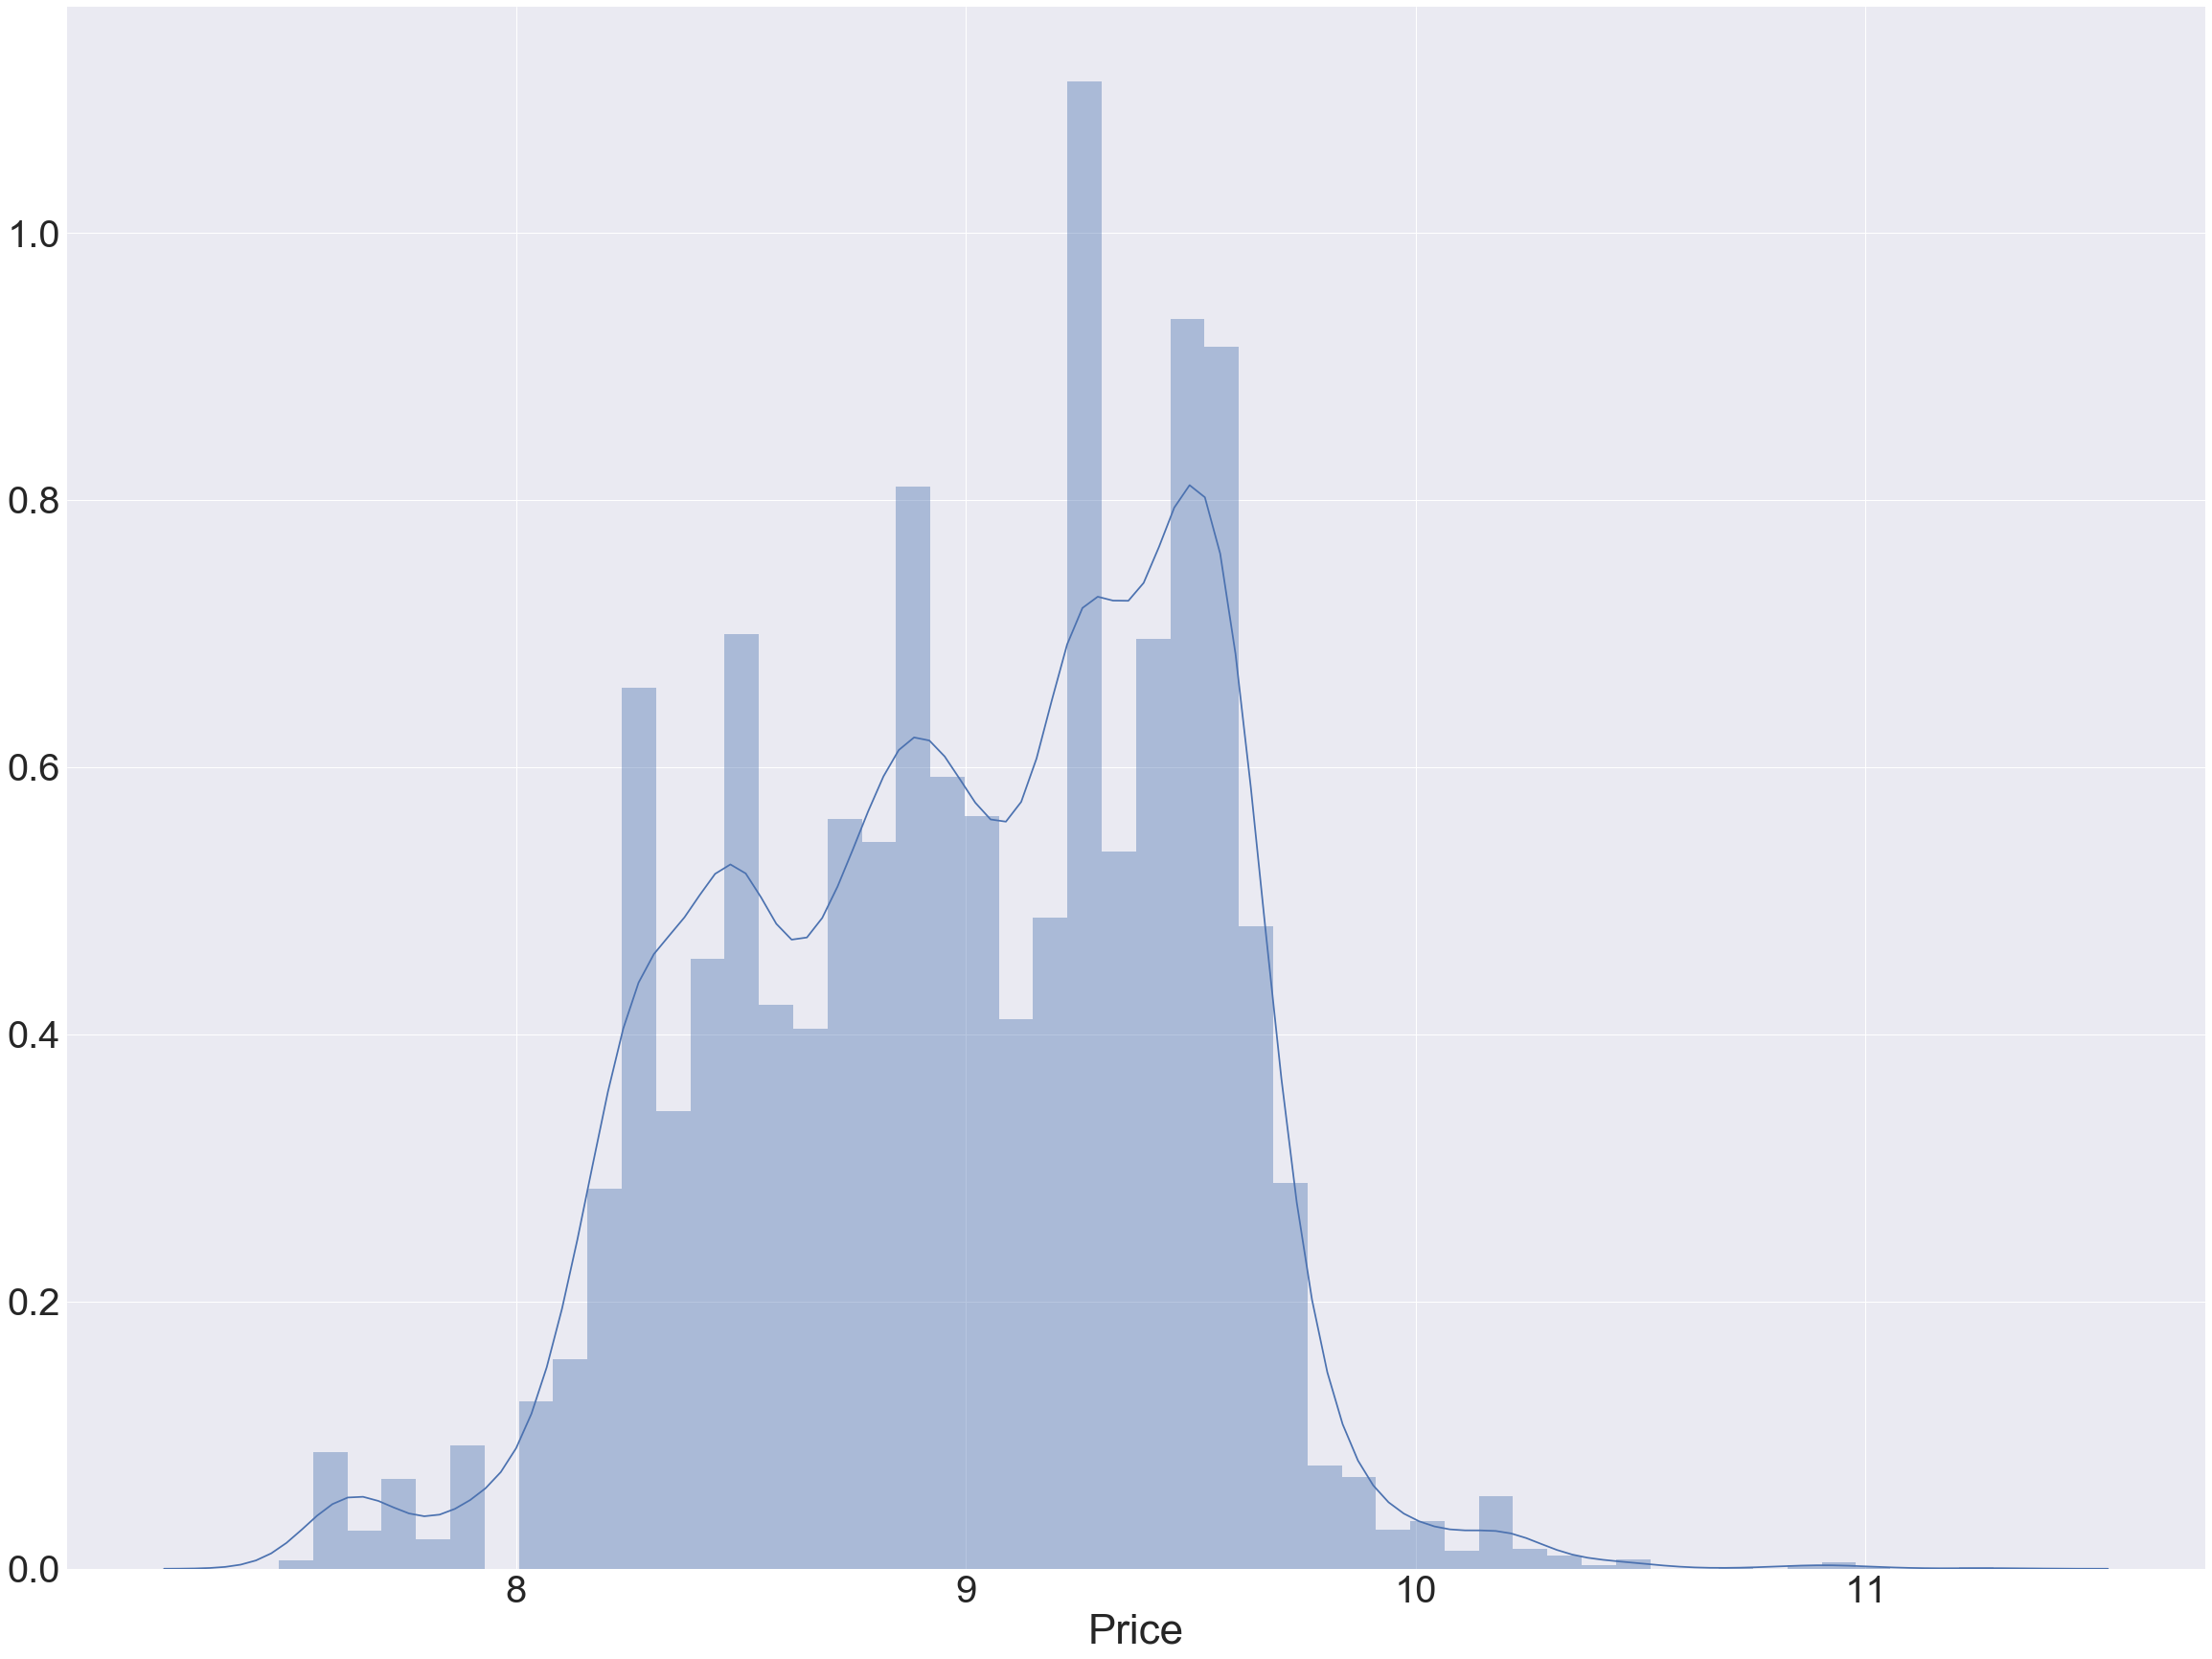

In [559]:
sns.distplot(np.log(raw_data["Price"]))
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=4)   
plt.show()

In [560]:
raw_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [561]:
raw_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [562]:
raw_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [563]:
bckup.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


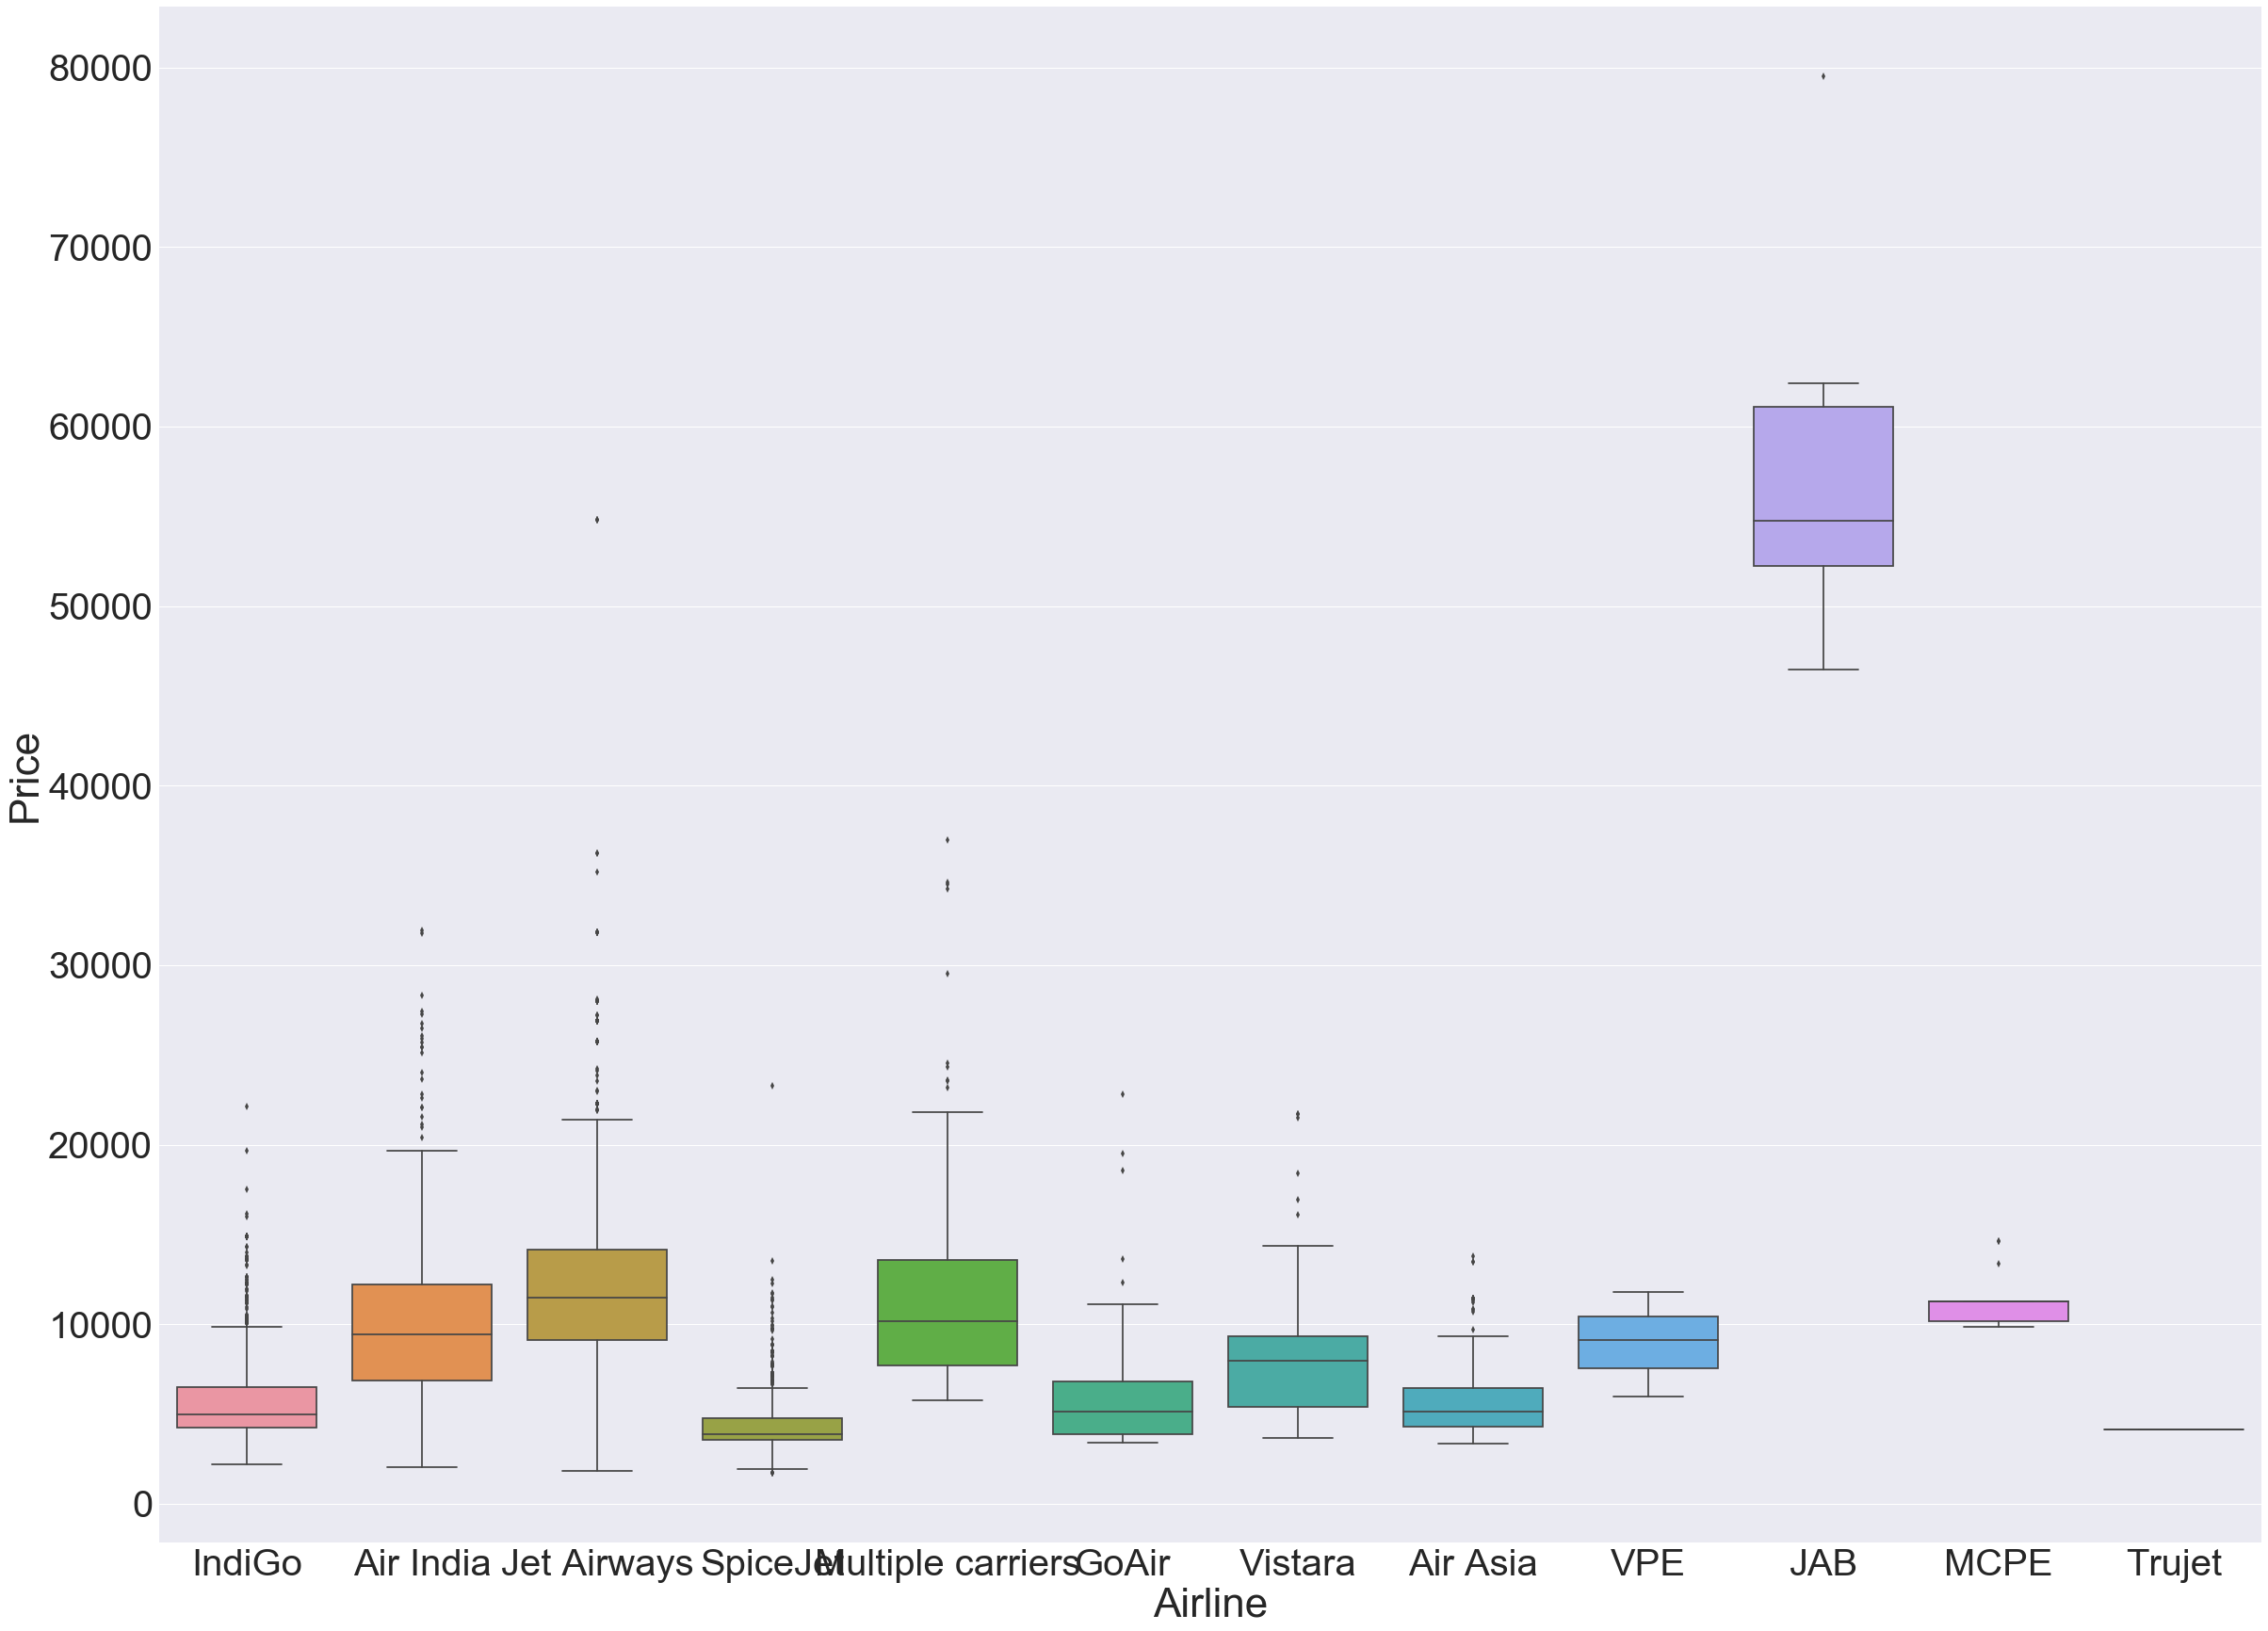

In [564]:
sns.boxplot(x = 'Airline', y = 'Price', data = raw_data)
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=1)   
plt.show()

In [565]:
raw_data[(raw_data['Source']=='Banglore')& (raw_data['Destination']=='New Delhi')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
21,Air India,2019-03-21,Banglore,New Delhi,BLR → COK → DEL,22:00,13:20 19 Mar,15h 20m,1 stop,No info,6955
38,Jet Airways,2019-06-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,13:15,6h 15m,1 stop,No info,19225
41,Air India,2019-03-15,Banglore,New Delhi,BLR → BOM → DEL,06:45,15:15,8h 30m,1 stop,No info,8714
45,SpiceJet,2019-03-24,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,3527
52,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 28 Mar,2h 50m,non-stop,No info,4377


In [566]:
raw_data['Arrival_Time'].str.split(" ",expand = True).head(3)

,0,1,2
0,01:10,22,Mar
1,13:15,None,None
2,04:25,10,Jun


In [567]:
raw_data['Route'].str.split("→",expand = True)[0].count()

10682

In [568]:
raw_data['Dep_Time'] = pd.to_datetime(raw_data['Dep_Time'])
raw_data['Arr_time'] = raw_data['Arrival_Time'].str.split(" ",expand = True)[0]
raw_data['Arr_time']=pd.to_datetime(raw_data['Arr_time'])
raw_data['Arr_New_date'] = raw_data['Arrival_Time'].str.split(" ",expand = True)[1]
raw_data['Arr_Month']=raw_data['Arrival_Time'].str.split(" ",expand = True)[2]
raw_data.drop(['Arrival_Time'], inplace=True, axis=1)

In [569]:
raw_data['month_year'] = pd.to_datetime(raw_data['Date_of_Journey']).dt.to_period('M')

In [570]:
raw_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arr_time,Arr_New_date,Arr_Month,month_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-21 22:20:00,2h 50m,non-stop,No info,3897,2019-03-21 01:10:00,22,Mar,2019-03
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-03-21 05:50:00,7h 25m,2 stops,No info,7662,2019-03-21 13:15:00,None,None,2019-01
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-03-21 09:25:00,19h,2 stops,No info,13882,2019-03-21 04:25:00,10,Jun,2019-09
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-03-21 18:05:00,5h 25m,1 stop,No info,6218,2019-03-21 23:30:00,None,None,2019-12


In [571]:
raw_data['Weekend']=((pd.DatetimeIndex(raw_data.Date_of_Journey).dayofweek) // 5 == 1).astype(float)


In [572]:
print(raw_data['month_year'].value_counts())
print("\n")
print('*'*110)
print("\n")
print(raw_data.groupby('month_year').sum()['Price'])

2019-06    2536
2019-03    2211
2019-05    2074
2019-09    1406
2019-01    1075
2019-12     957
2019-04     424
Freq: M, Name: month_year, dtype: int64


**************************************************************************************************************


month_year
2019-01    11279591
2019-03    18647220
2019-04     2217885
2019-05    19414875
2019-06    23369151
2019-09    13429373
2019-12     8719011
Freq: M, Name: Price, dtype: int64


In [573]:
print("The number of weekends are",raw_data[raw_data['Weekend']==1]['Price'].count())
print("The mean price for weekends is",raw_data[raw_data['Weekend']==1]['Price'].sum())
print("The number of weekdays are",raw_data[raw_data['Weekend']==0]['Price'].count())
print("The mean price for weekdays",raw_data[raw_data['Weekend']==0]['Price'].sum())


The number of weekends are 2265
The mean price for weekends is 20849285
The number of weekdays are 8418
The mean price for weekdays 76227821


In [574]:
int(20849285/2265)

9204

In [575]:
int(76227821/8418)

9055

In [576]:
print('2,08,49,285')
print('7,62,27,821')

2,08,49,285
7,62,27,821


In [577]:
def Airline_Wknd_Wkday(i):
 print("The number of weekends for",i, "are",raw_data[(raw_data['Weekend']==1) & (raw_data['Airline']==i)]['Price'].count())
 print("The mean price for weekends is",raw_data[(raw_data['Weekend']==1)  & (raw_data['Airline']==i)]['Price'].sum())
 print("The number of weekdays for",i," are",raw_data[(raw_data['Weekend']==0)& (raw_data['Airline']==i)]['Price'].count())
 print("The mean price for weekdays",raw_data[(raw_data['Weekend']==0)& (raw_data['Airline']==i)]['Price'].sum())
 print("\n")
 print("*"*100)

In [578]:
for i in raw_data['Airline'].unique():
    Airline_Wknd_Wkday(i)

The number of weekends for IndiGo are 466
The mean price for weekends is 2886365
The number of weekdays for IndiGo  are 1587
The mean price for weekdays 8761706


****************************************************************************************************
The number of weekends for Air India are 371
The mean price for weekends is 3715352
The number of weekdays for Air India  are 1381
The mean price for weekdays 13123489


****************************************************************************************************
The number of weekends for Jet Airways are 754
The mean price for weekends is 8671447
The number of weekdays for Jet Airways  are 3095
The mean price for weekdays 36146014


****************************************************************************************************
The number of weekends for SpiceJet are 179
The mean price for weekends is 835022
The number of weekdays for SpiceJet  are 639
The mean price for weekdays 2713695


*************************

In [579]:
raw_data['hrs_D']=raw_data['Duration'].str.split(" ", expand=True)[0]
raw_data['mins_D']=raw_data['Duration'].str.split(" ", expand=True)[1]
raw_data['hrs_D'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
raw_data['mins_D'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
raw_data['mins_D'].fillna(0, inplace=True)

raw_data["hrs_D"] = pd.to_numeric(raw_data["hrs_D"])
raw_data["mins_D"] = pd.to_numeric(raw_data["mins_D"])

raw_data["hrs_D"]*=60


raw_data.drop(['Duration'], inplace=True, axis=1)
raw_data['Duration'] = raw_data['hrs_D']+raw_data['mins_D']

raw_data.drop(['hrs_D'], inplace=True, axis=1)
raw_data.drop(['mins_D'], inplace=True, axis=1)

In [580]:
raw_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [581]:
raw_data['Total_Stops']=raw_data['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})

In [582]:
raw_data.drop(['Additional_Info'], inplace=True,axis=1)

In [583]:
raw_data.drop(['Route'], inplace=True,axis=1)

In [584]:
raw_data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Arr_time,Arr_New_date,Arr_Month,month_year,Weekend,Duration
0,IndiGo,2019-03-24,Banglore,New Delhi,2019-03-21 22:20:00,0.0,3897,2019-03-21 01:10:00,22,Mar,2019-03,1.0,170
1,Air India,2019-01-05,Kolkata,Banglore,2019-03-21 05:50:00,2.0,7662,2019-03-21 13:15:00,None,None,2019-01,1.0,445
2,Jet Airways,2019-09-06,Delhi,Cochin,2019-03-21 09:25:00,2.0,13882,2019-03-21 04:25:00,10,Jun,2019-09,0.0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,2019-03-21 18:05:00,1.0,6218,2019-03-21 23:30:00,None,None,2019-12,0.0,325
4,IndiGo,2019-01-03,Banglore,New Delhi,2019-03-21 16:50:00,1.0,13302,2019-03-21 21:35:00,None,None,2019-01,0.0,285
5,SpiceJet,2019-06-24,Kolkata,Banglore,2019-03-21 09:00:00,0.0,3873,2019-03-21 11:25:00,None,None,2019-06,0.0,145
6,Jet Airways,2019-12-03,Banglore,New Delhi,2019-03-21 18:55:00,1.0,11087,2019-03-21 10:25:00,13,Mar,2019-12,0.0,930
7,Jet Airways,2019-01-03,Banglore,New Delhi,2019-03-21 08:00:00,1.0,22270,2019-03-21 05:05:00,02,Mar,2019-01,0.0,1265
8,Jet Airways,2019-12-03,Banglore,New Delhi,2019-03-21 08:55:00,1.0,11087,2019-03-21 10:25:00,13,Mar,2019-12,0.0,1530
9,Multiple carriers,2019-05-27,Delhi,Cochin,2019-03-21 11:25:00,1.0,8625,2019-03-21 19:15:00,None,None,2019-05,0.0,470


In [585]:
raw_data['Total_Stops'].fillna(1, inplace=True)

In [586]:
raw_data['Arr_New_date'].fillna(0, inplace=True)
raw_data['Arr_Month'].fillna('XXX', inplace=True)

In [587]:
raw_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Arr_time,Arr_New_date,Arr_Month,month_year,Weekend,Duration
0,IndiGo,2019-03-24,Banglore,New Delhi,2019-03-21 22:20:00,0.0,3897,2019-03-21 01:10:00,22,Mar,2019-03,1.0,170
1,Air India,2019-01-05,Kolkata,Banglore,2019-03-21 05:50:00,2.0,7662,2019-03-21 13:15:00,0,XXX,2019-01,1.0,445
2,Jet Airways,2019-09-06,Delhi,Cochin,2019-03-21 09:25:00,2.0,13882,2019-03-21 04:25:00,10,Jun,2019-09,0.0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,2019-03-21 18:05:00,1.0,6218,2019-03-21 23:30:00,0,XXX,2019-12,0.0,325


In [588]:
raw_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Total_Stops               float64
Price                       int64
Arr_time           datetime64[ns]
Arr_New_date               object
Arr_Month                  object
month_year                 object
Weekend                   float64
Duration                    int64
dtype: object

In [589]:
raw_data["Arr_New_date"] = pd.to_numeric(raw_data["Arr_New_date"])

In [590]:
raw_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Total_Stops               float64
Price                       int64
Arr_time           datetime64[ns]
Arr_New_date                int64
Arr_Month                  object
month_year                 object
Weekend                   float64
Duration                    int64
dtype: object

In [591]:
#X = pd.get_dummies(raw_data)

In [592]:
raw_data['month_year']=raw_data['Date_of_Journey'].dt.month

In [593]:
X = pd.get_dummies(raw_data)

In [597]:
len(X.columns)

37

In [598]:
raw_data['Date_of_Journey'].dt.month

0         3
1         1
2         9
3        12
4         1
5         6
6        12
7         1
8        12
9         5
10        1
11        4
12        6
13        9
14        4
15        3
16        4
17       12
18       12
19        5
20        6
21        3
22        3
23        1
24        6
25        9
26        1
27        5
28        6
29        6
         ..
10653     1
10654    12
10655     3
10656     6
10657     6
10658     6
10659     1
10660     3
10661     9
10662     3
10663     6
10664     9
10665     4
10666    12
10667    12
10668     9
10669     6
10670    12
10671     6
10672     6
10673     5
10674    12
10675     9
10676     1
10677     5
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Date_of_Journey, Length: 10683, dtype: int64

In [ ]:
X